In [19]:
import os
WM_PROJECT_USER_DIR=os.environ['WM_PROJECT_USER_DIR']
import sys 
sys.path.append(f"{WM_PROJECT_USER_DIR}/utilities")
import numpy as np
import pandas as pd
import postProcess.polyMesh2d as mesh2d
import postProcess.pyResconstruct as pyResconstruct
import postProcess.pyFigure as pyFigure
import matplotlib.pyplot as plt

In [10]:
folder='../postProcess'

In [12]:
def readDataAndProcess(folder,timeName):
    df=pyFigure.readData(folder,timeName)
    df["UNorm"]=np.sqrt(df['U_0']**2 + df['U_1']**2 + df['U_2']**2)
    MO2=0.032 #g/mol
    df["O2Conc"]=df['rho']*df['eps']*df['O2']/MO2
    MCO2=0.044 #g/mol
    df["CO2Conc"]=df['rho']*df['eps']*df['CO2']/MO2
    return df
def plotContours(df):
    pyFigure.plot_contourf(df,"eps",label='porosity')
    pyFigure.plot_contourf(df,"Qdot",label='Reaction Heat Rate (J/(m$^3\cdot$s))')
    pyFigure.plot_contourf(df,"T",label='Temperature ($^{\circ}$C)')
    pyFigure.plot_contourf(df,"O2Conc",label='O$_2$ mole concentration (mol/m$^3$)')


In [16]:
Pe=0.02
DO2 = 7.63596e-6
w = 30e-6
U_0   = Pe*DO2/w
print(f"inlet velocity: {U_0} m/s")
print(f"air flux: {U_0*60} m3/(m2 min) ")
print(f"reference air flux:0.24~1.90 m3/(m2 min)  ")

inlet velocity: 0.00509064 m/s
air flux: 0.3054384 m3/(m2 min) 
reference air flux:0.24~1.90 m3/(m2 min)  


## Show Contours

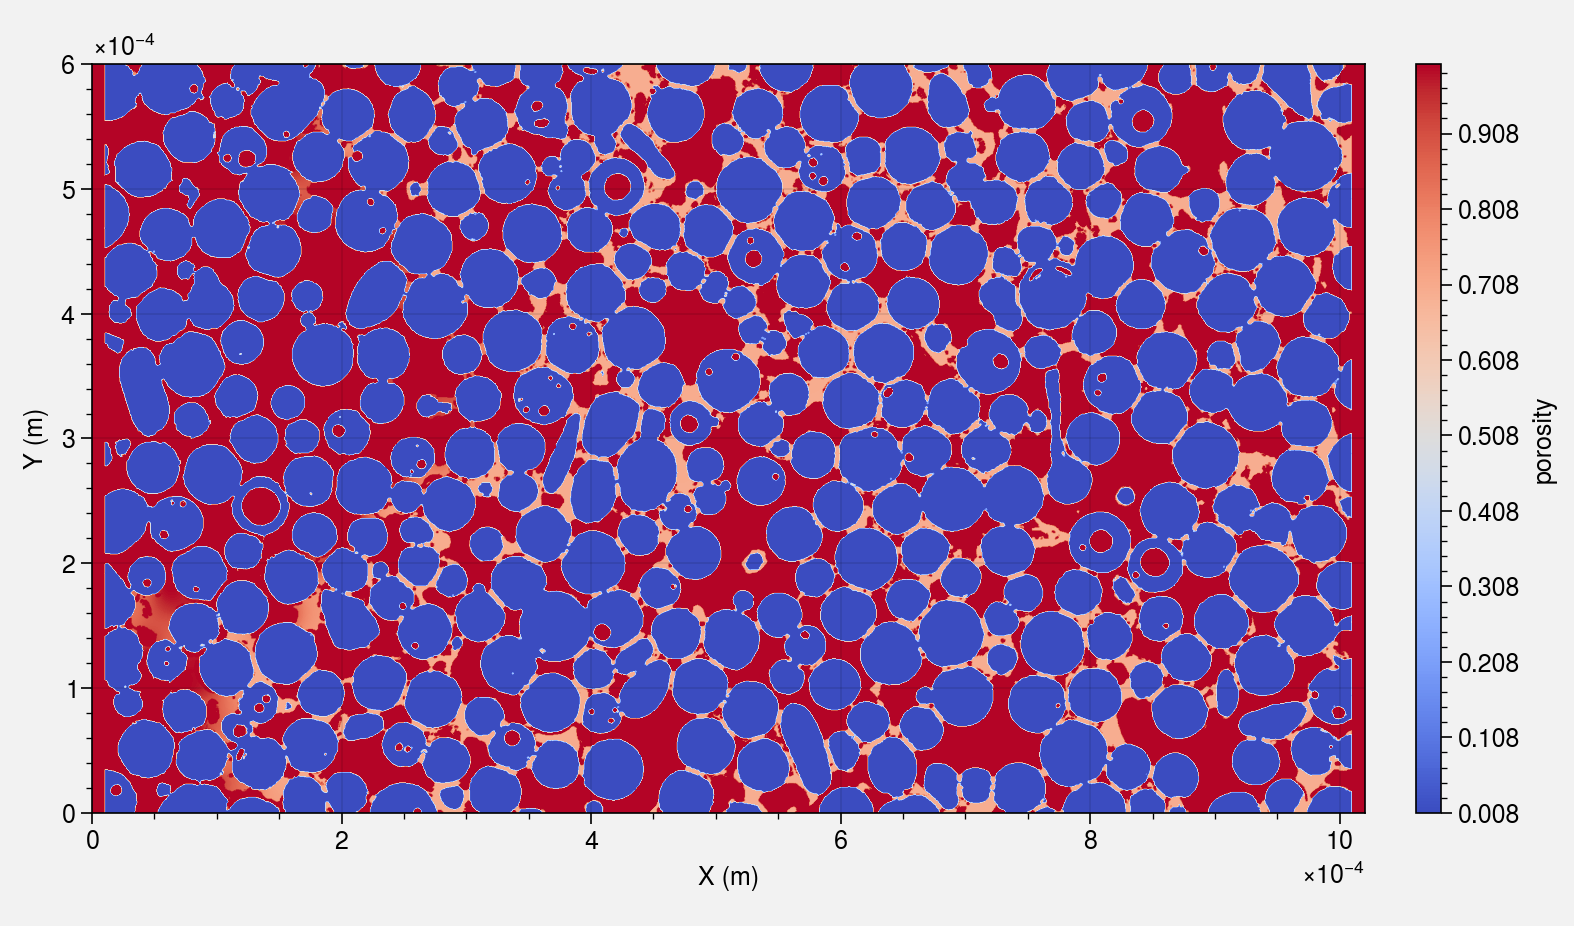

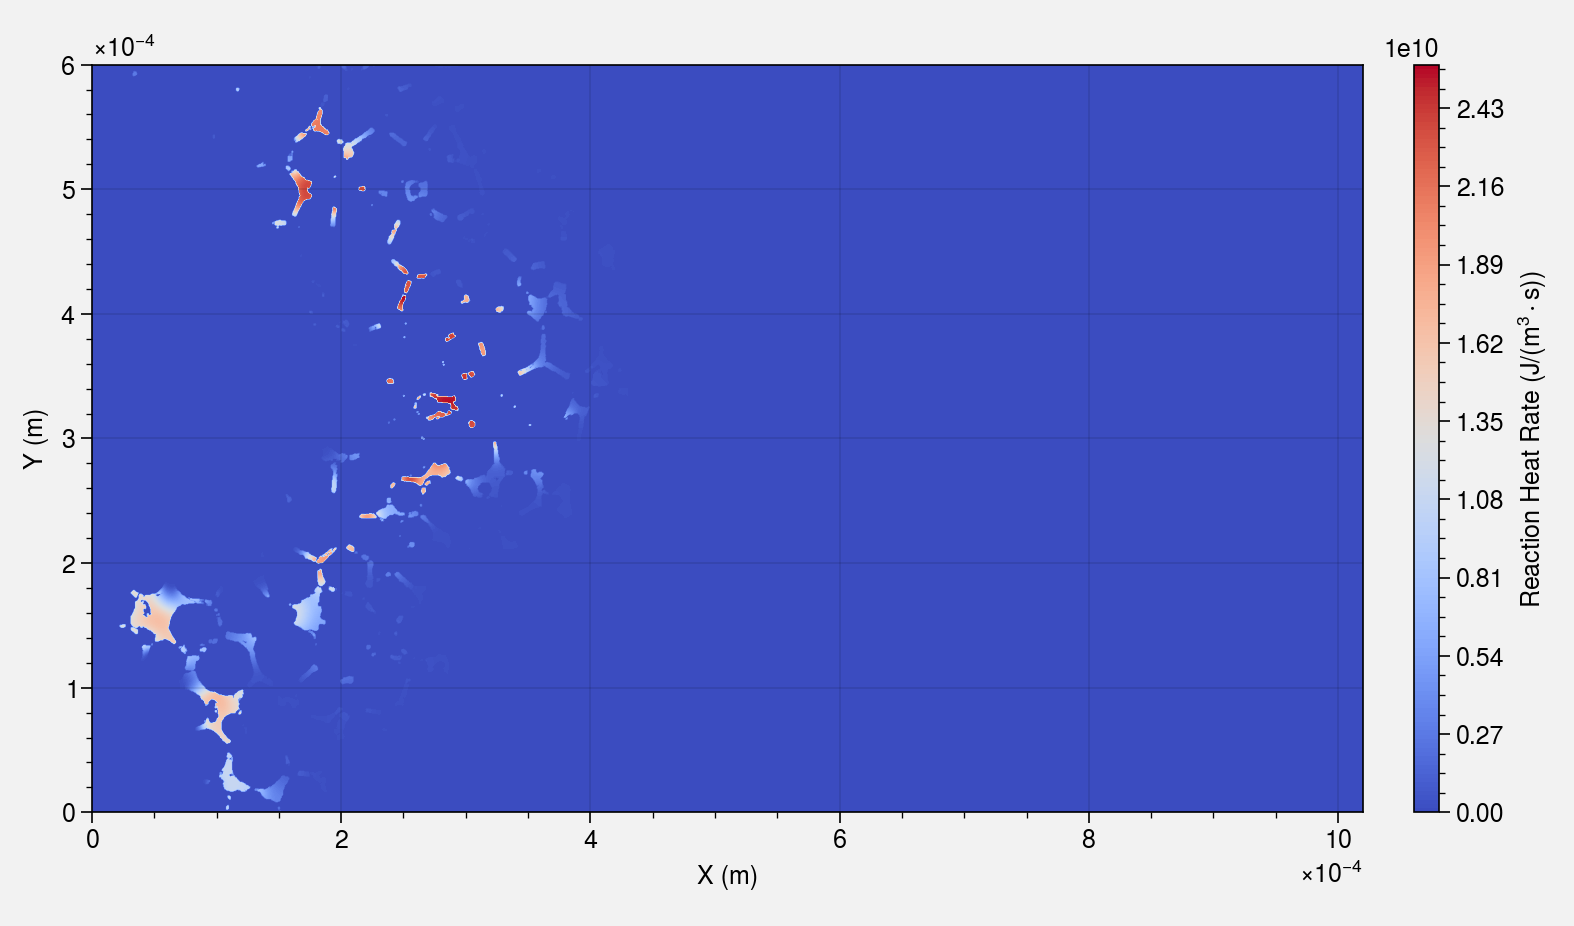

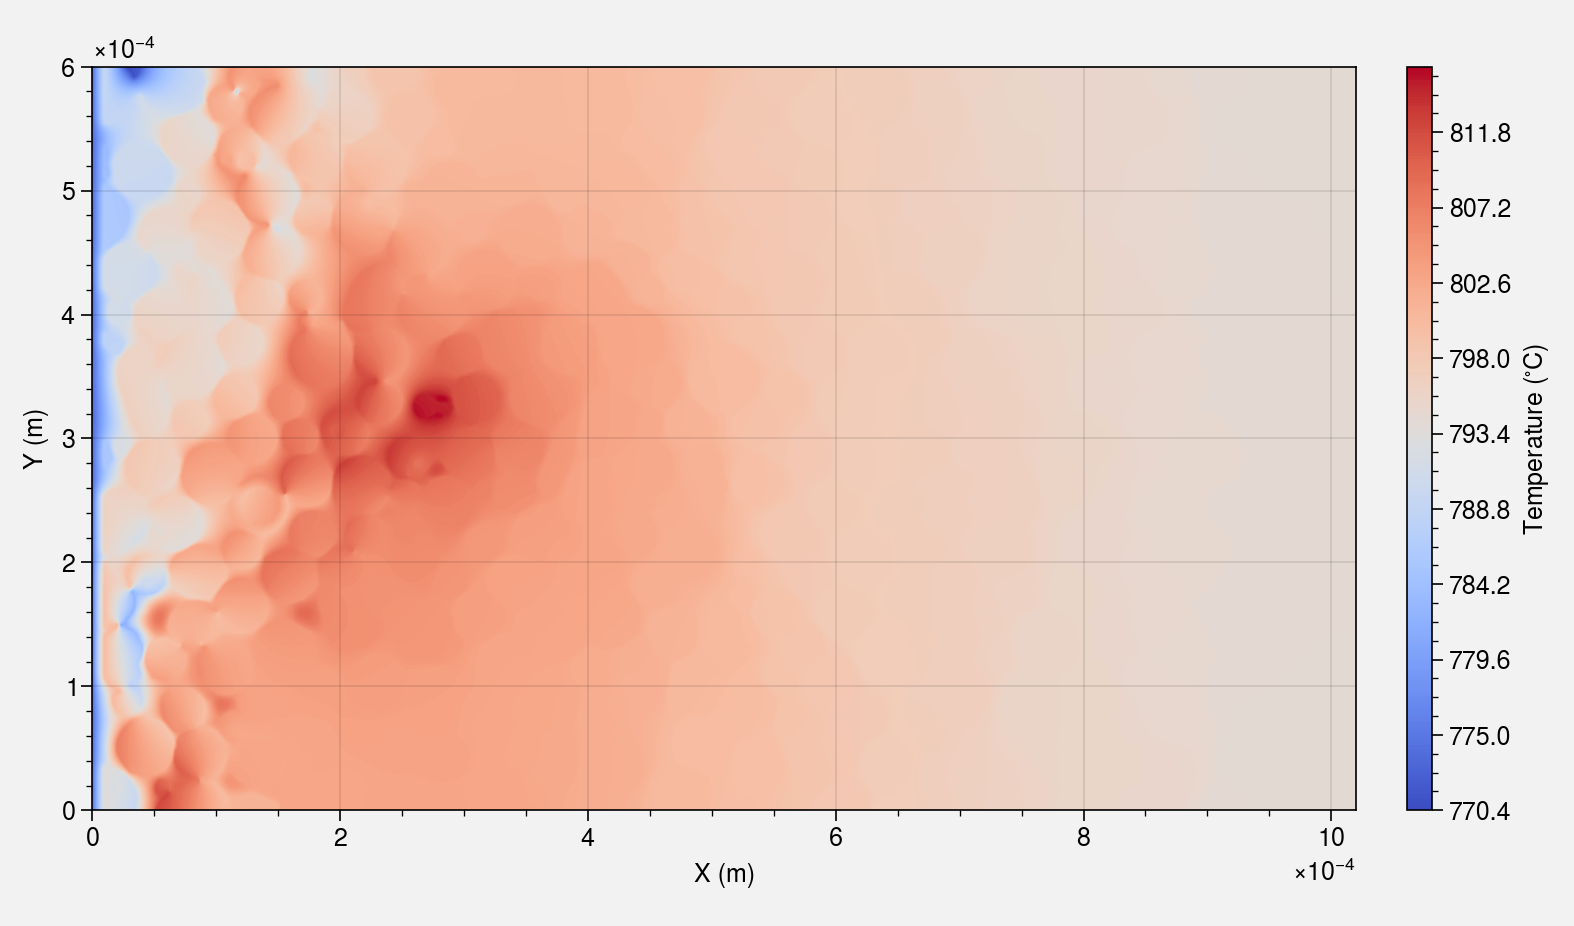

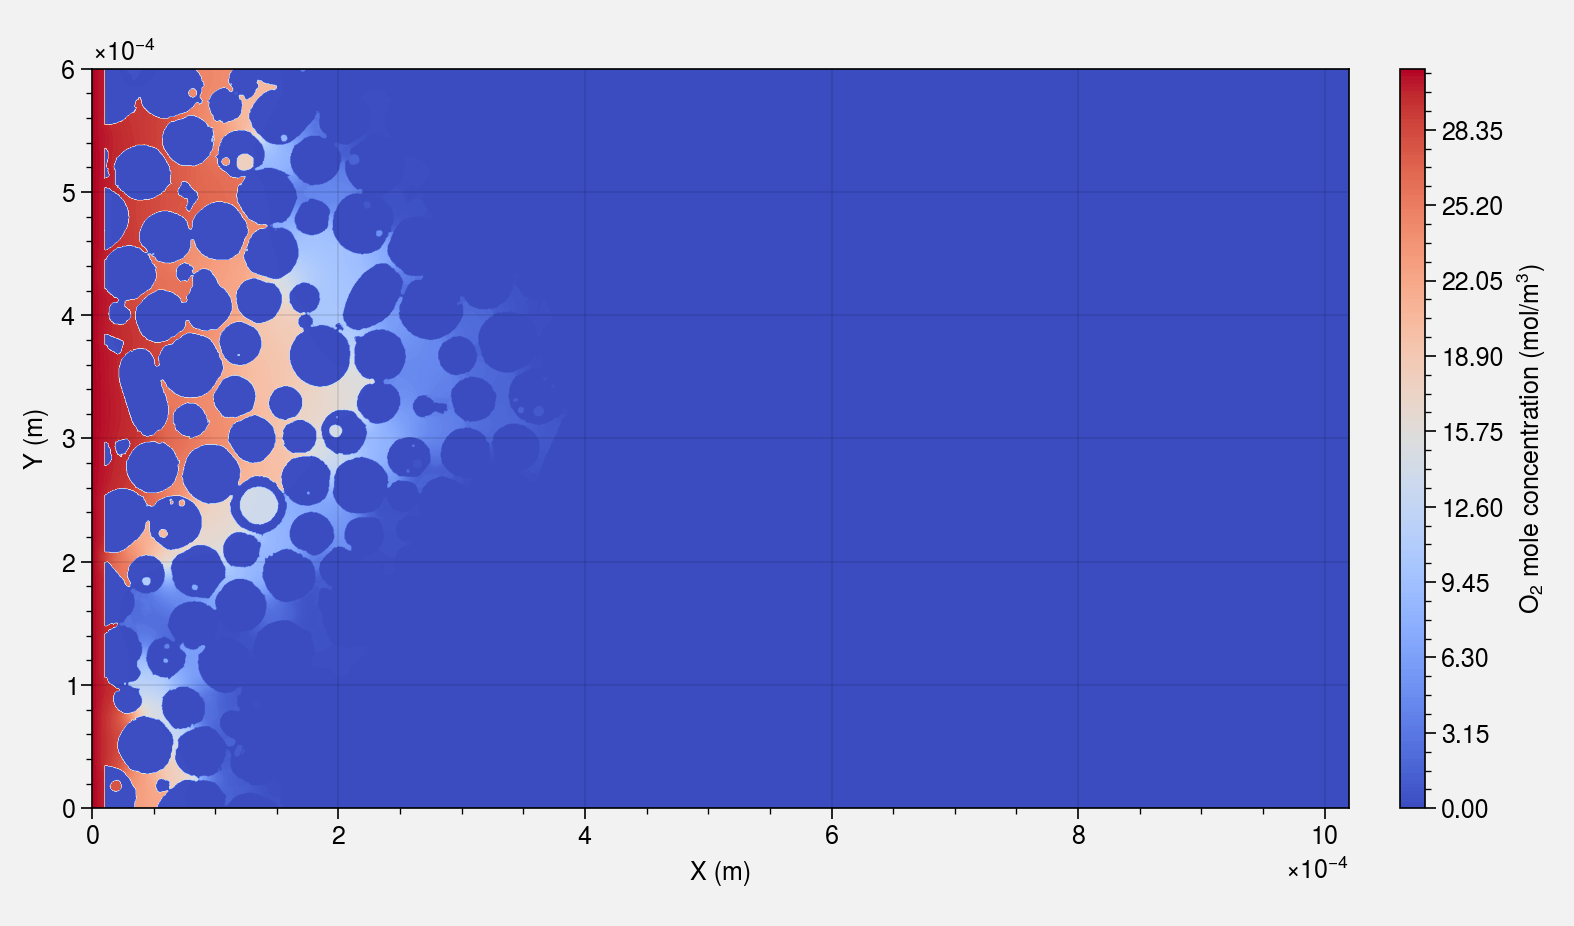

In [13]:
df1=readDataAndProcess(folder,"1.01")
plotContours(df1)

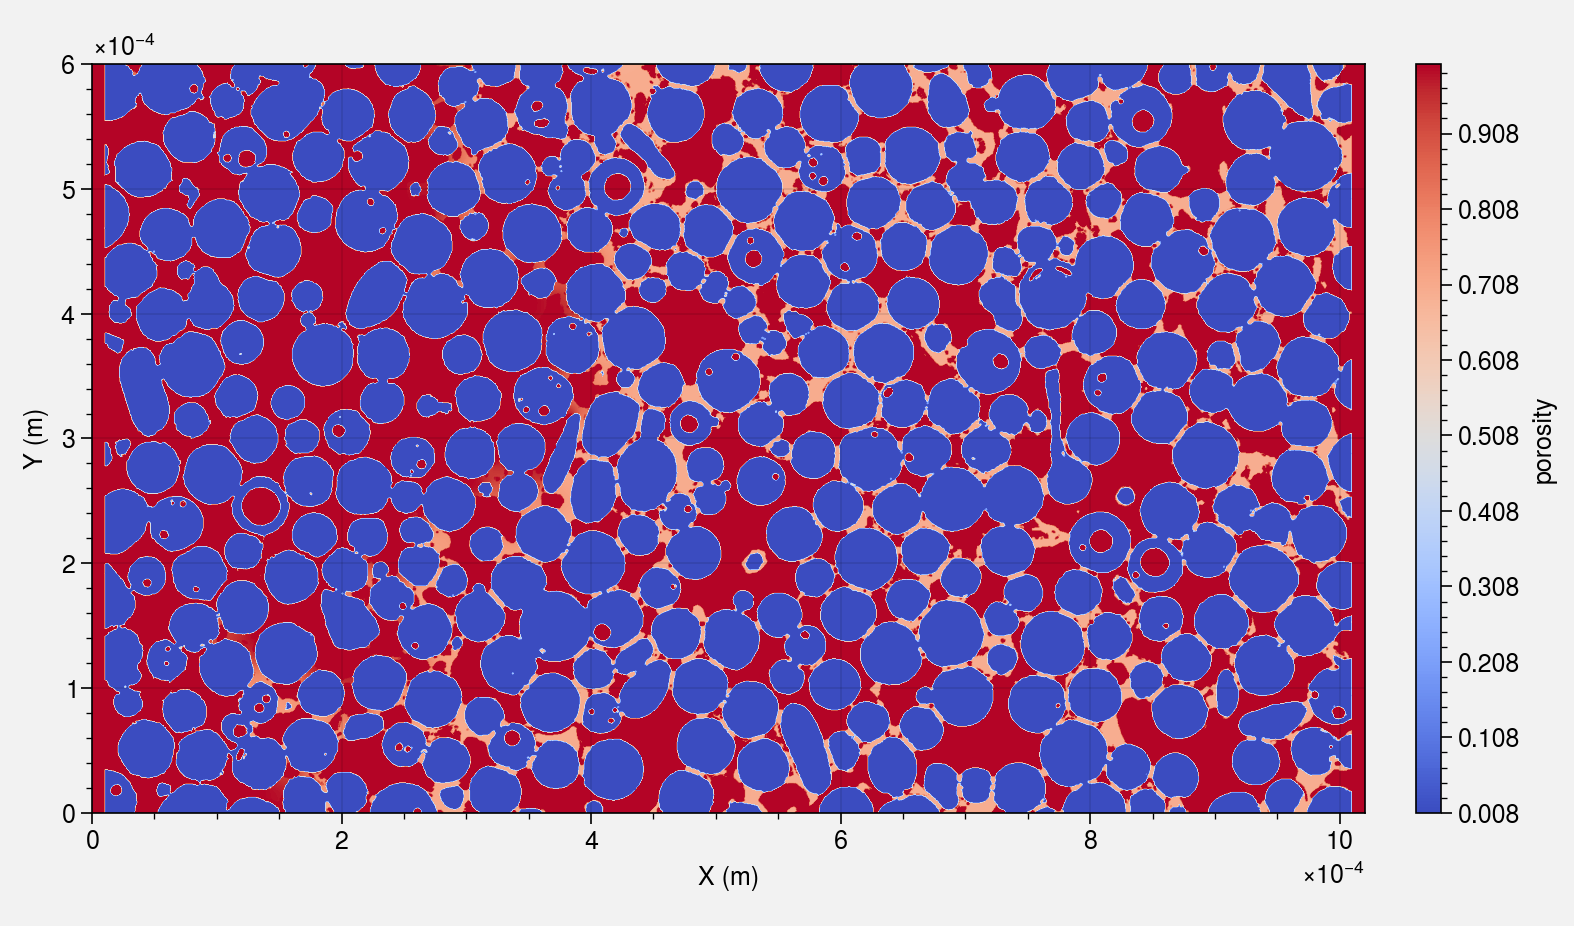

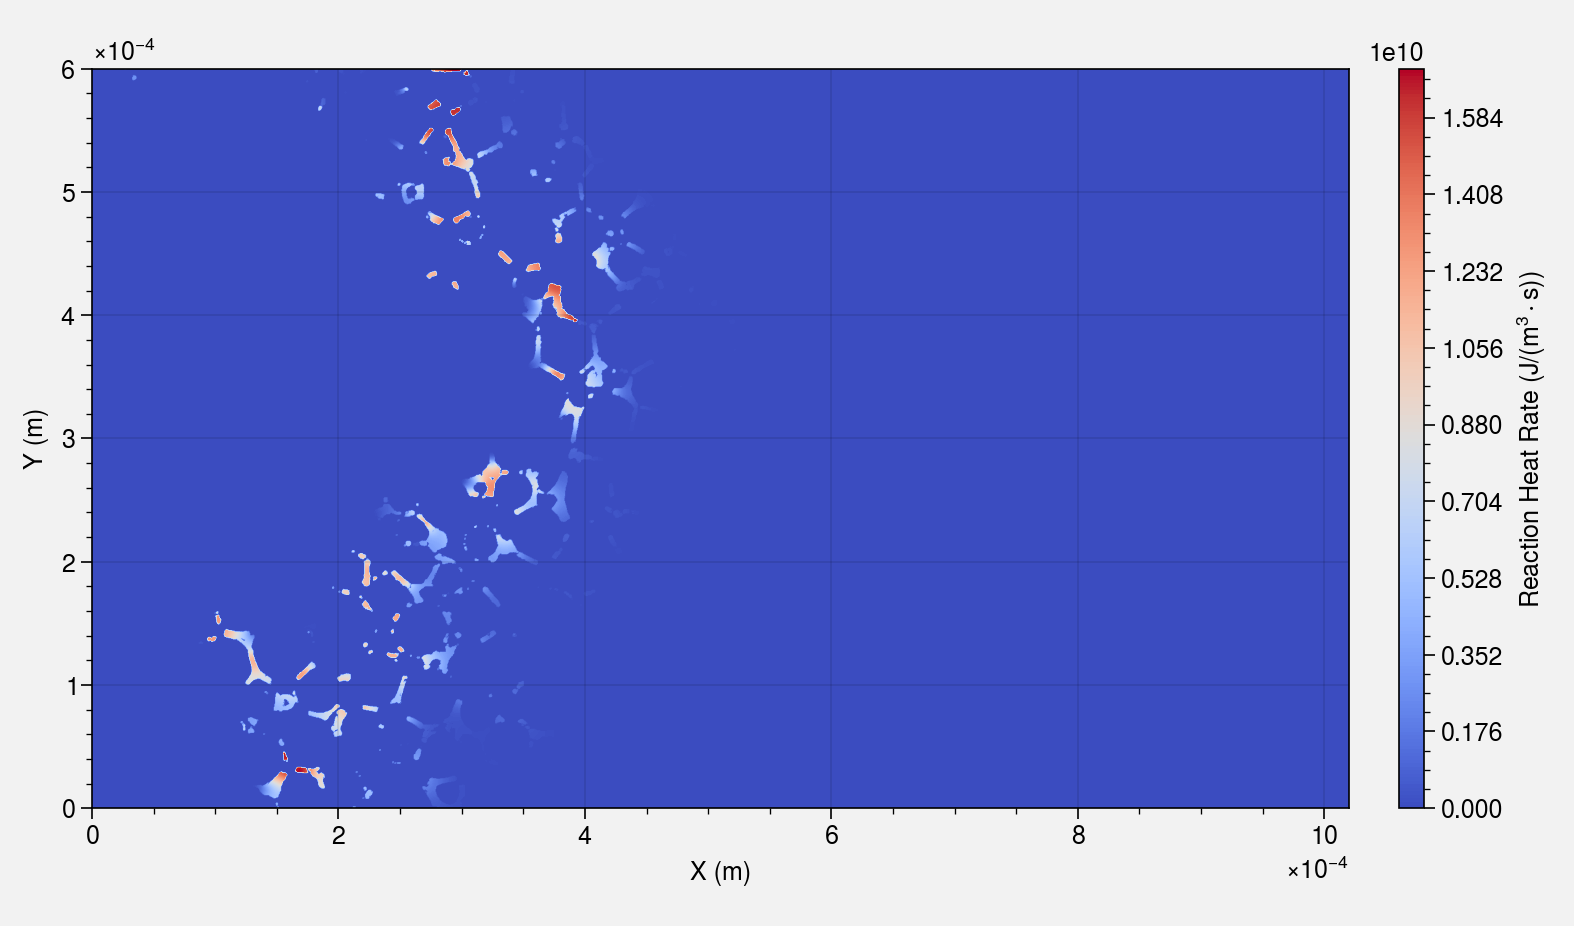

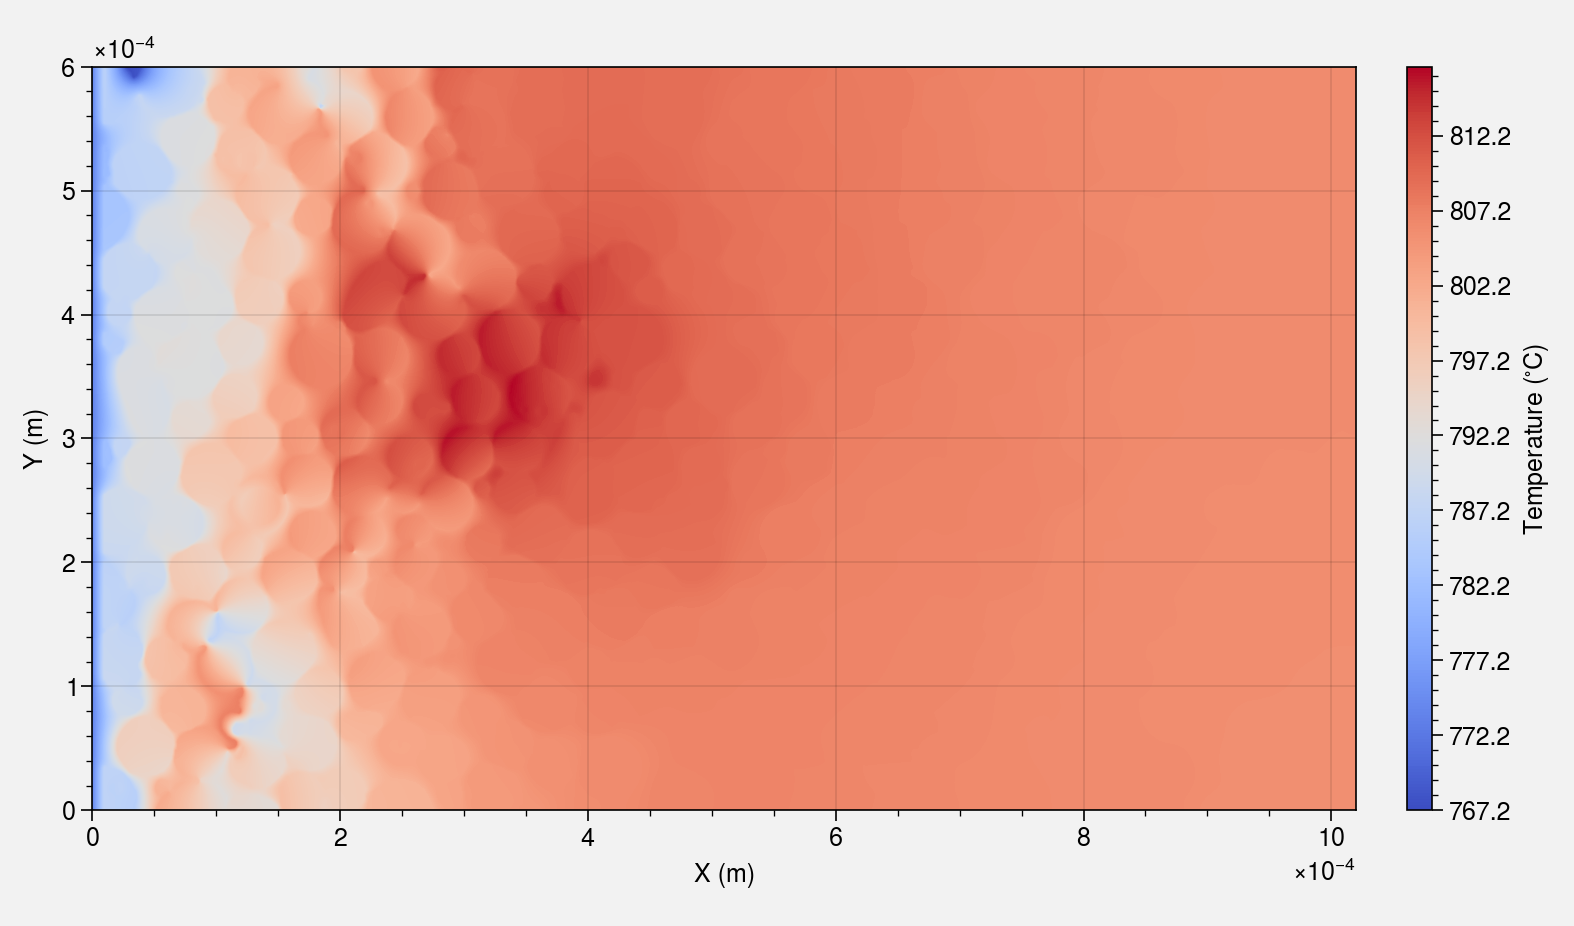

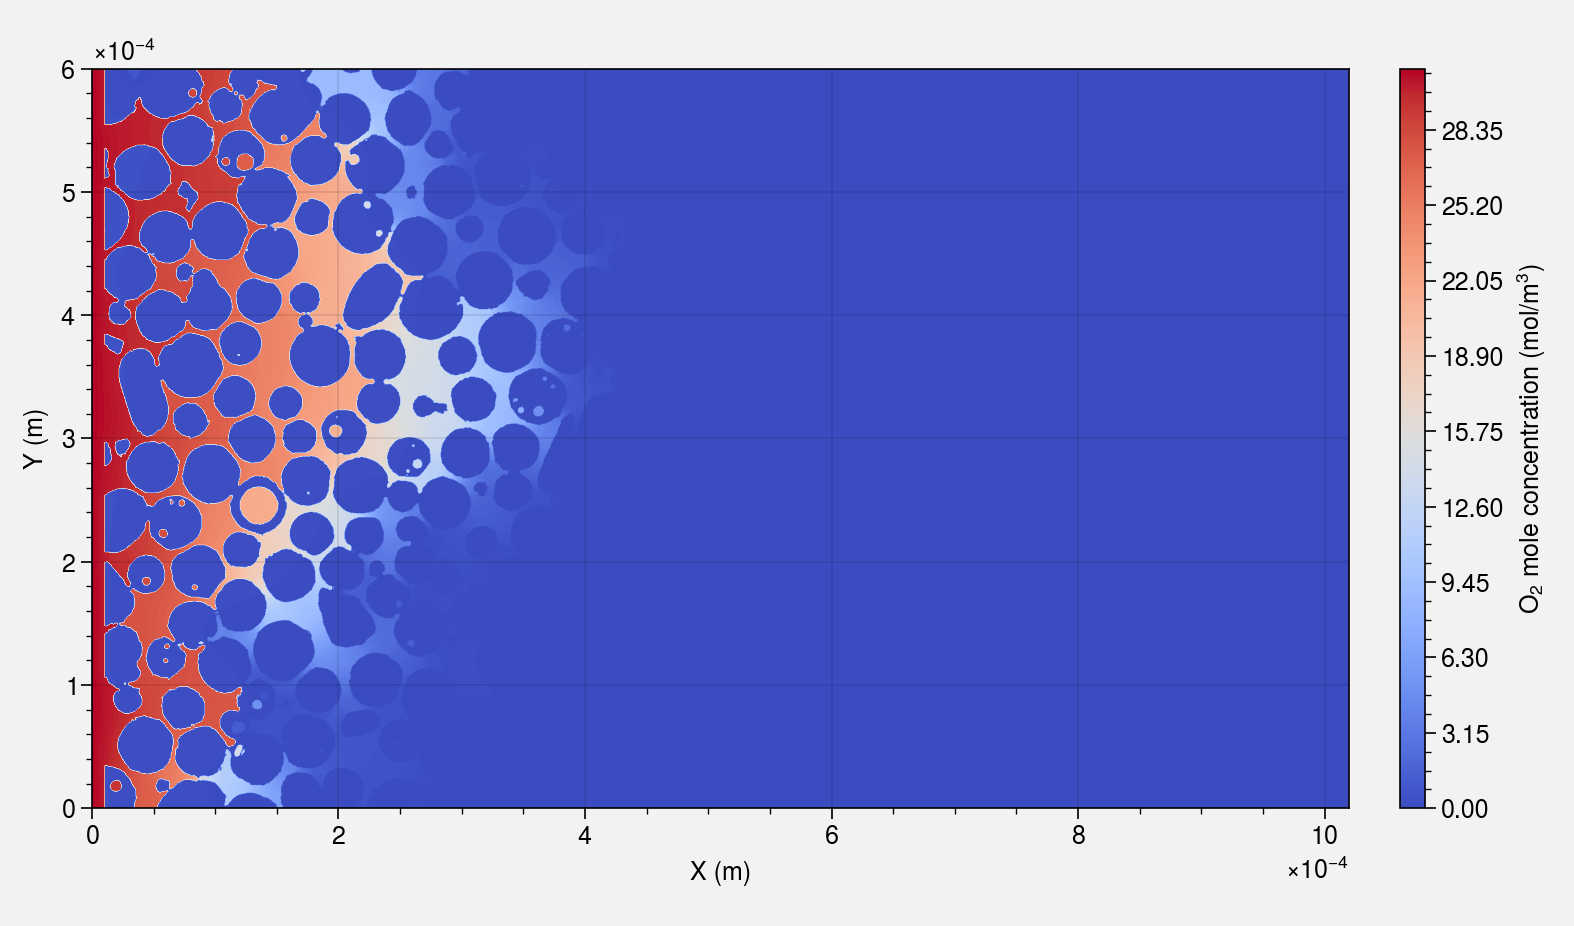

In [14]:
df2=readDataAndProcess(folder,"2.01")
plotContours(df2)

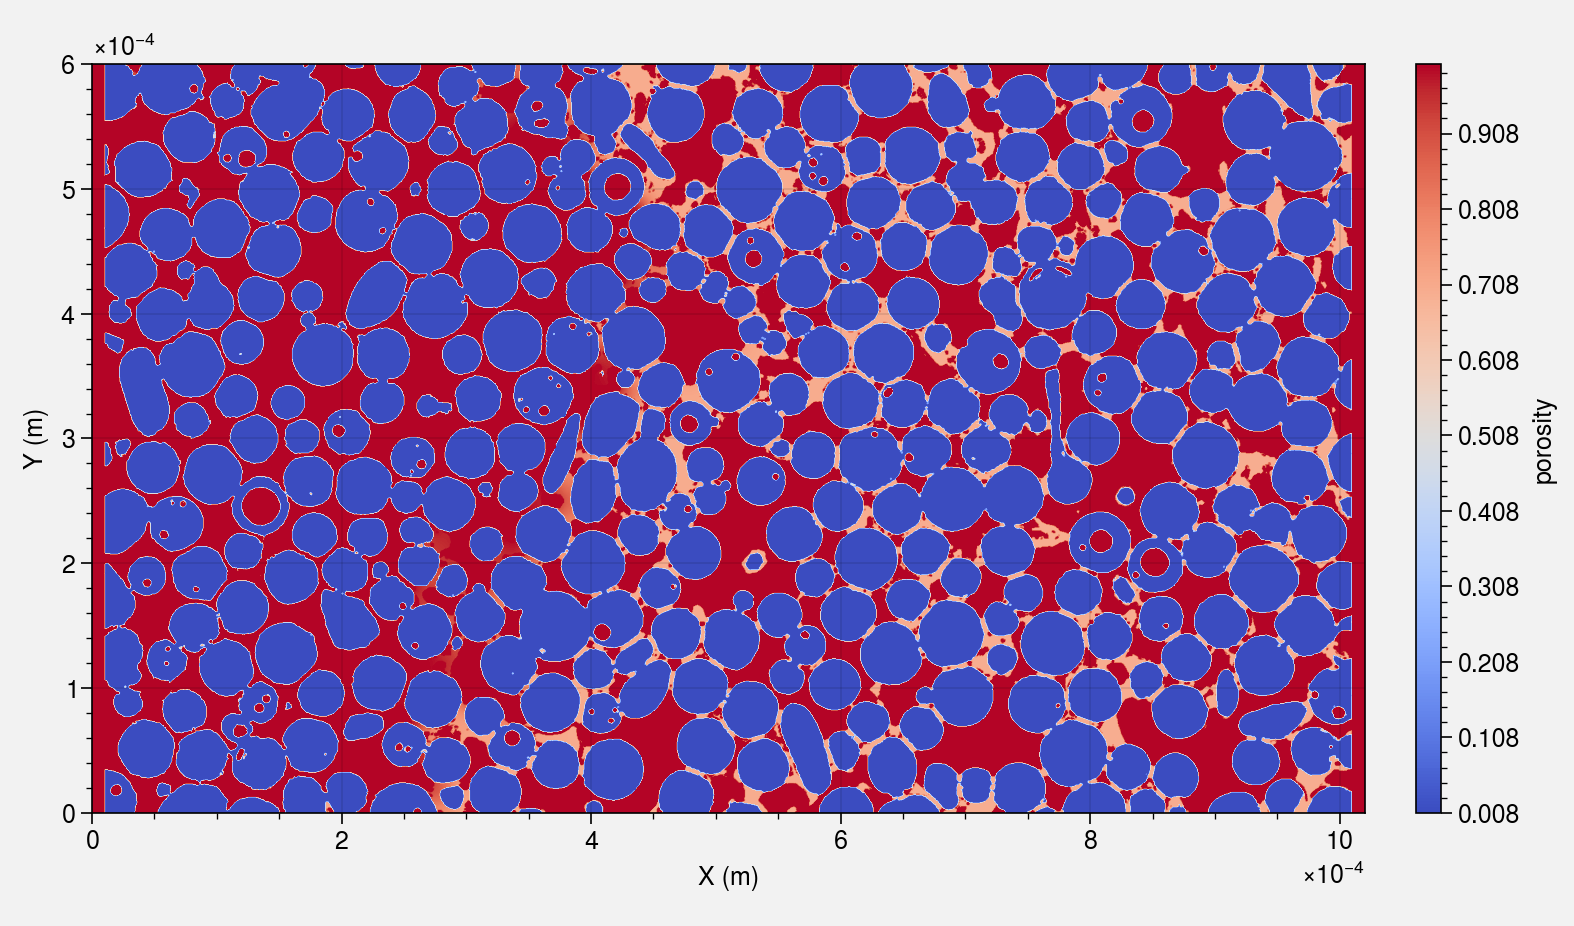

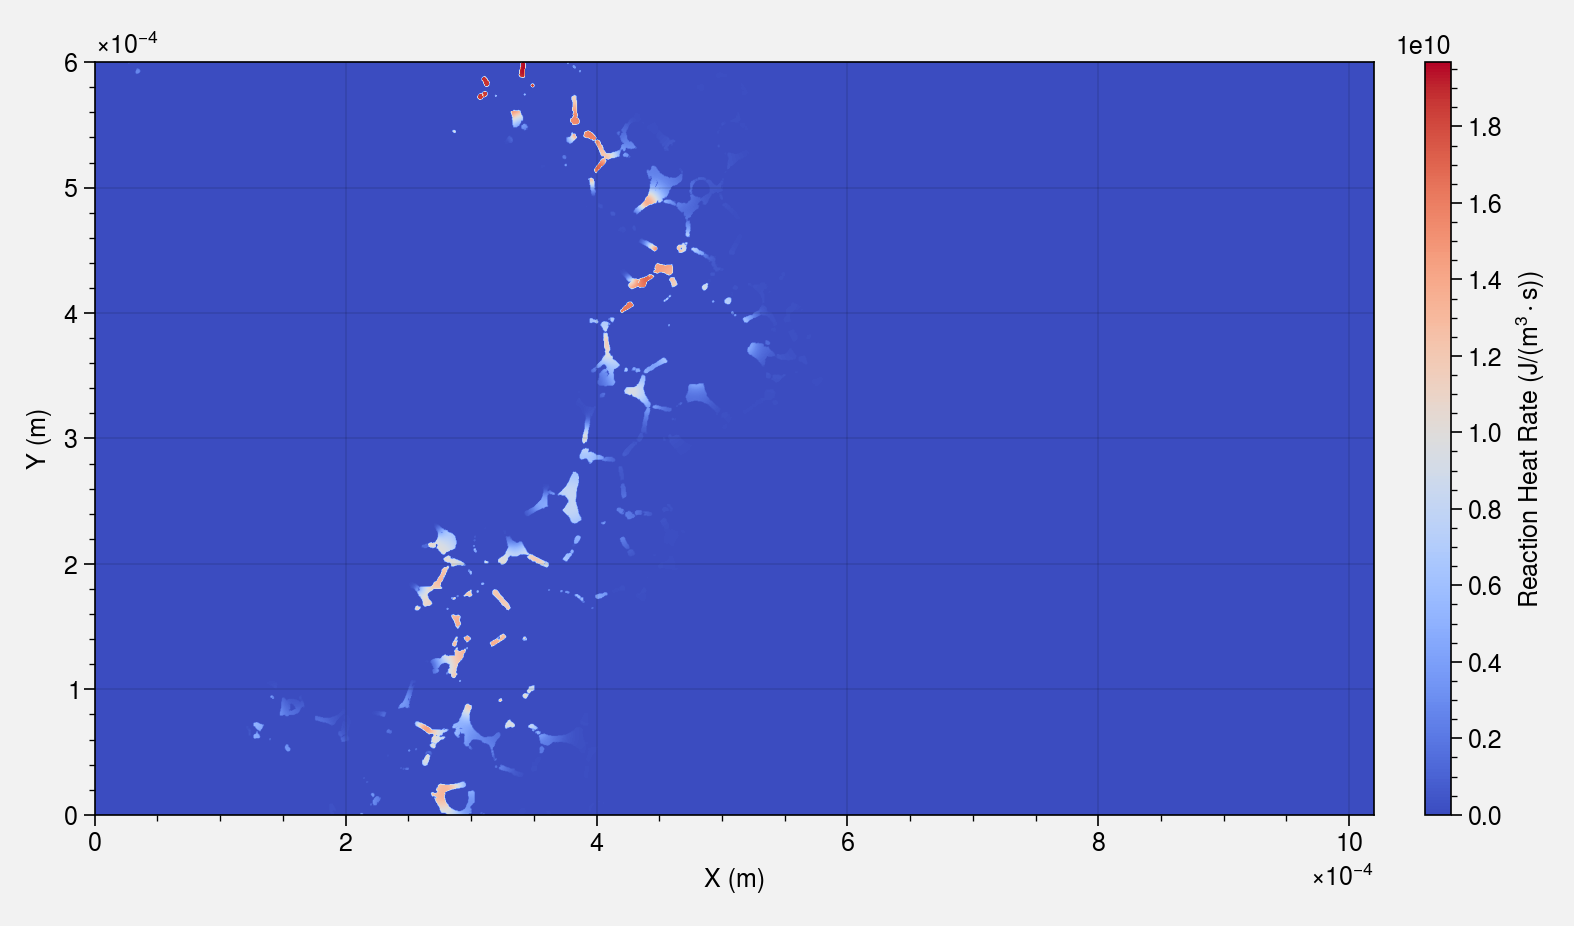

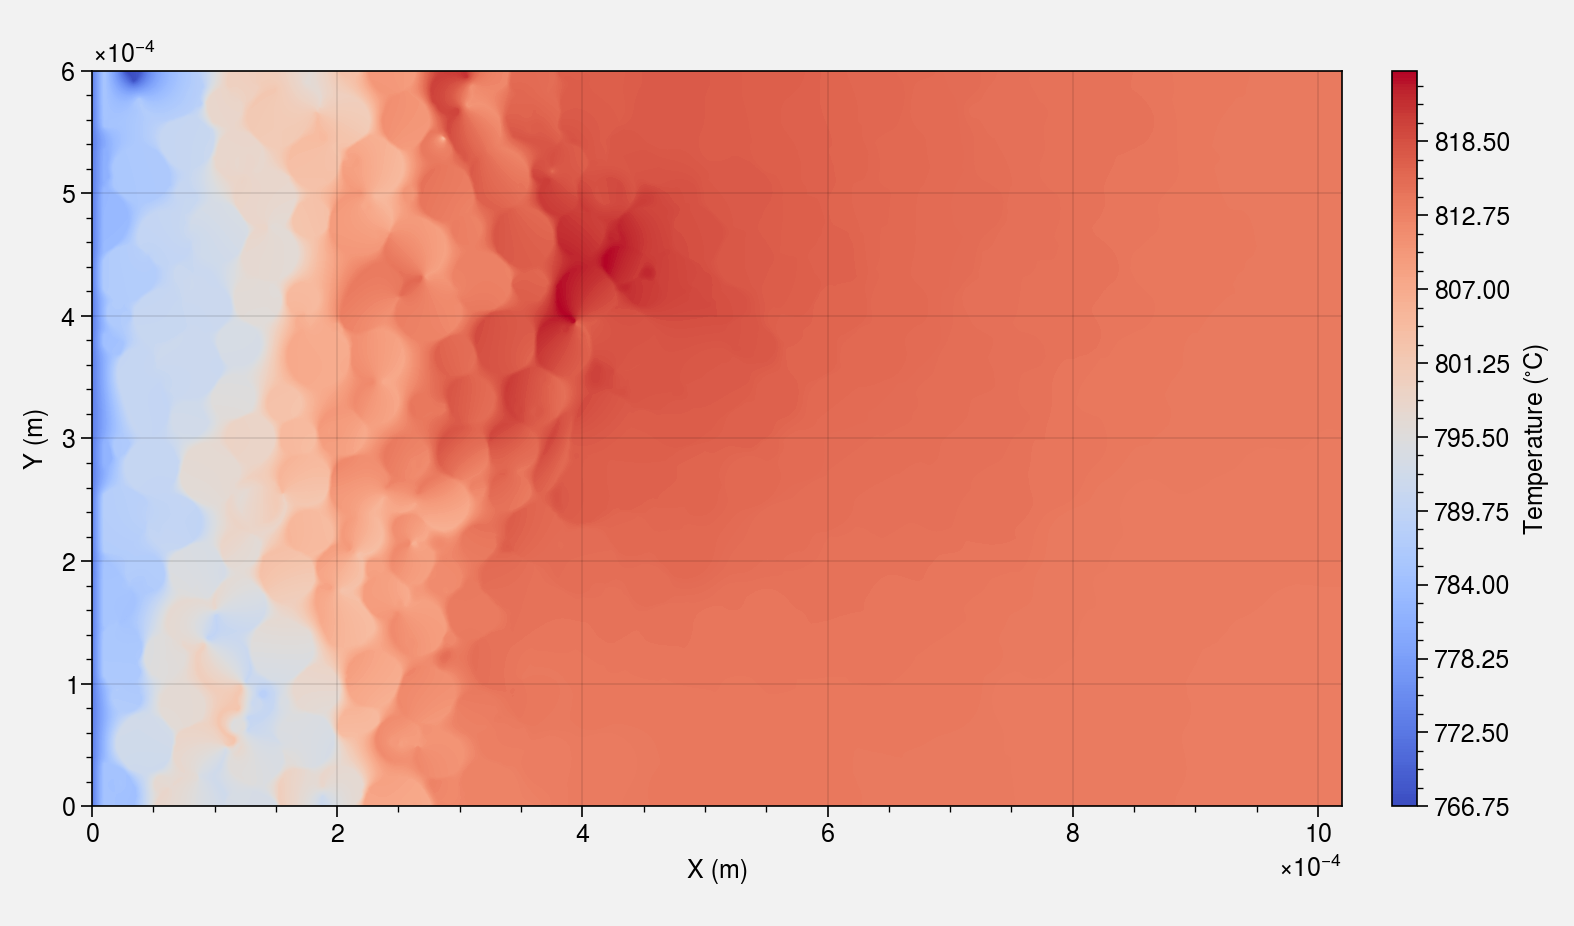

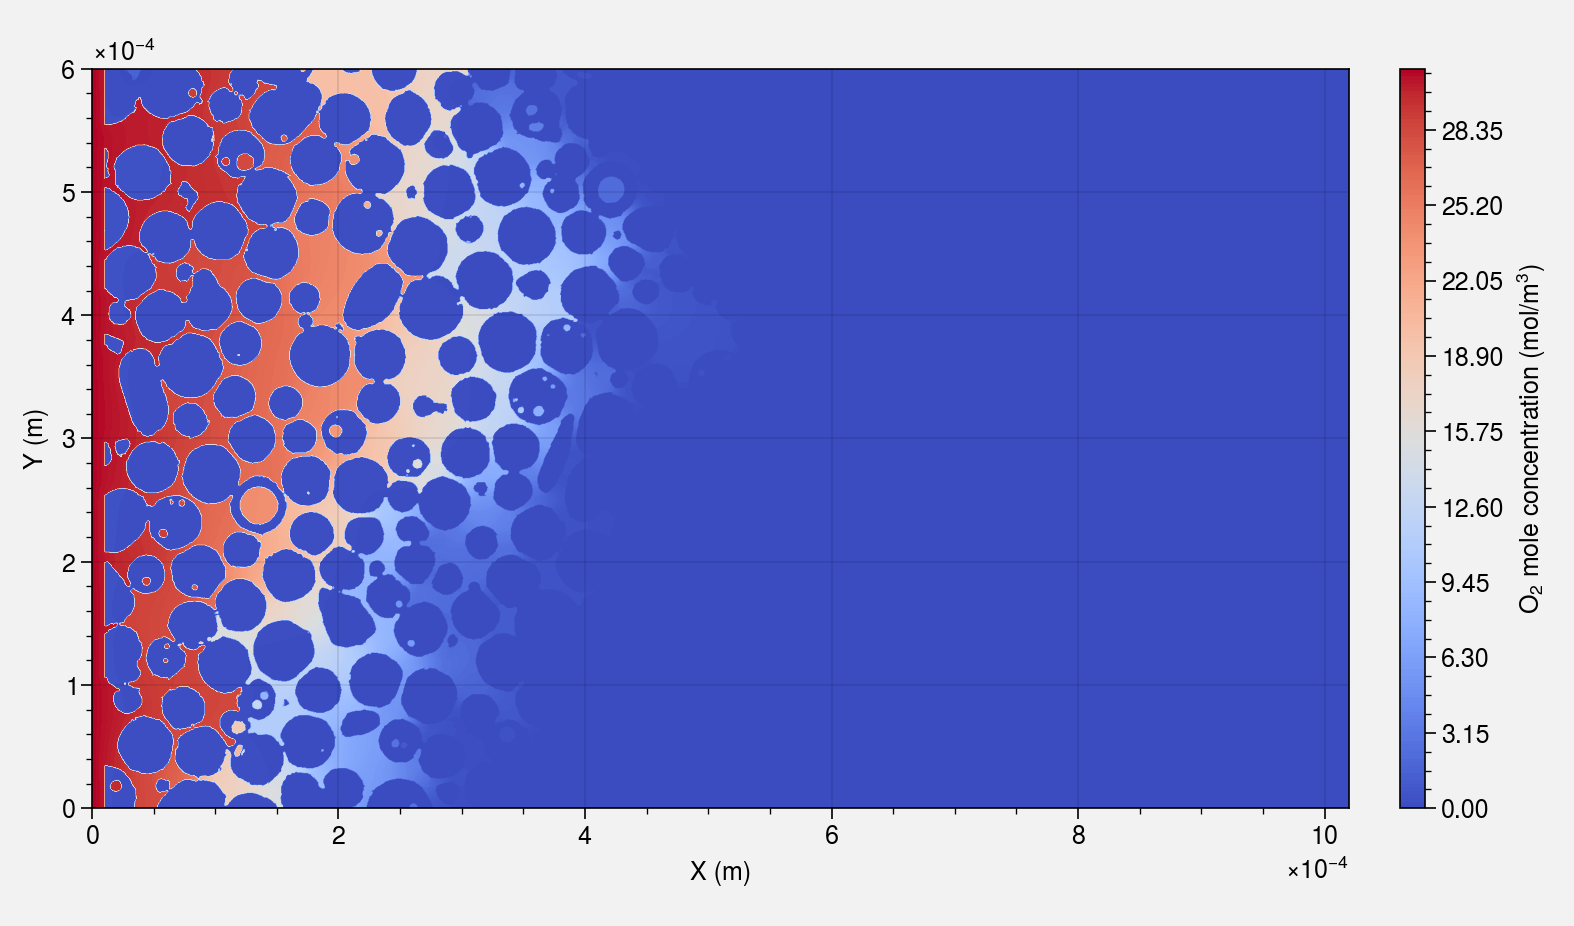

In [15]:
df3=readDataAndProcess(folder,"3.01")
plotContours(df3)

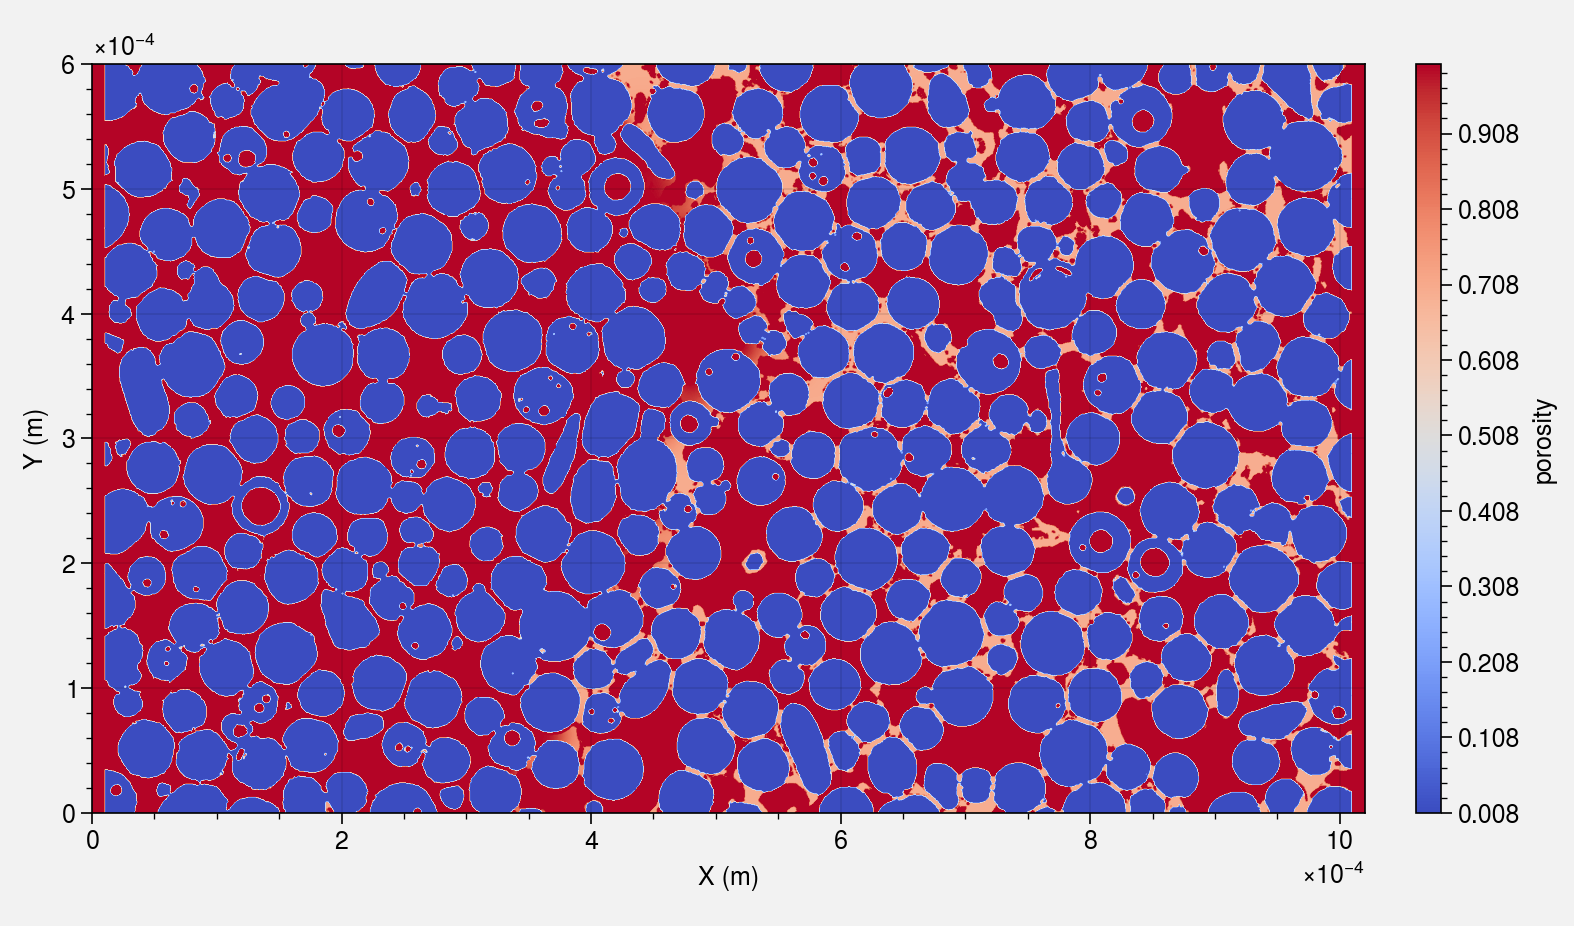

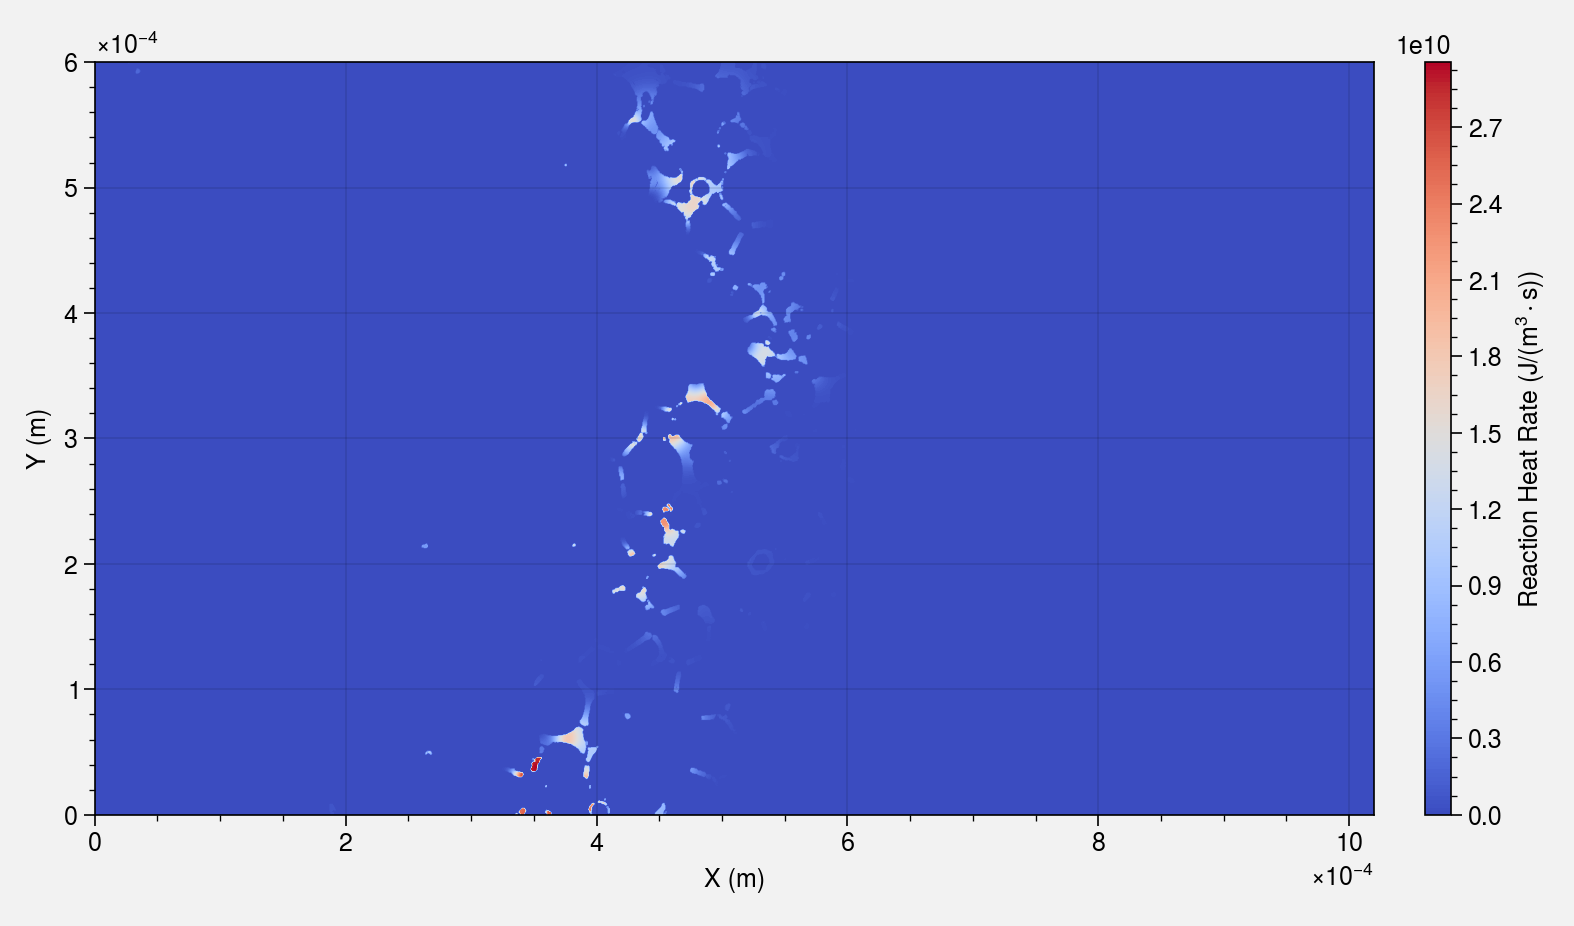

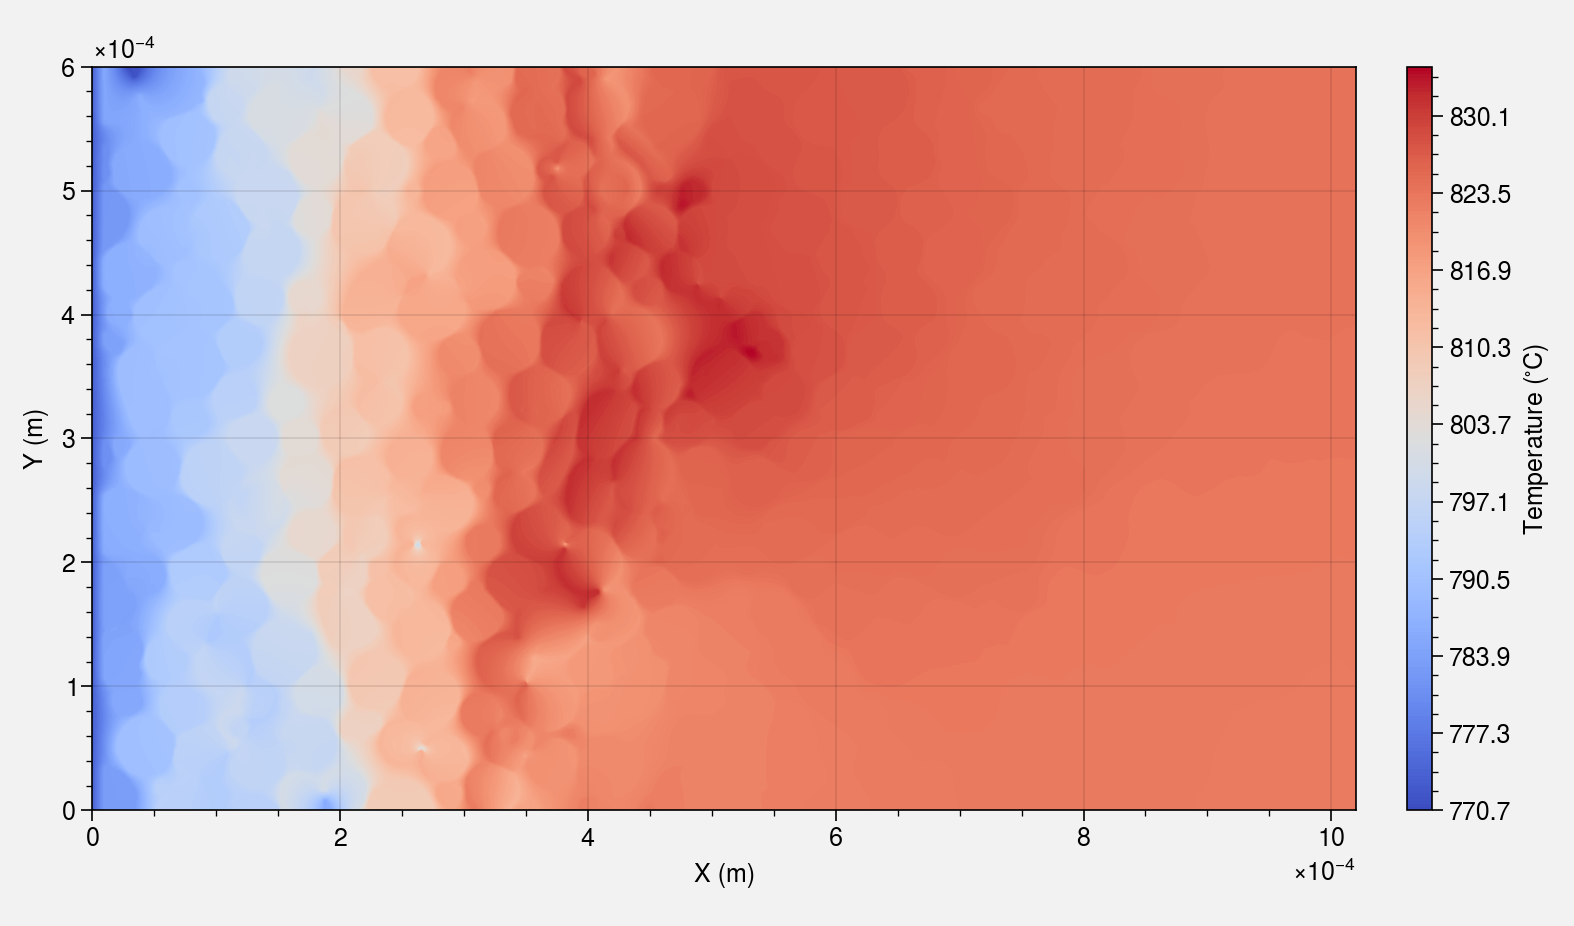

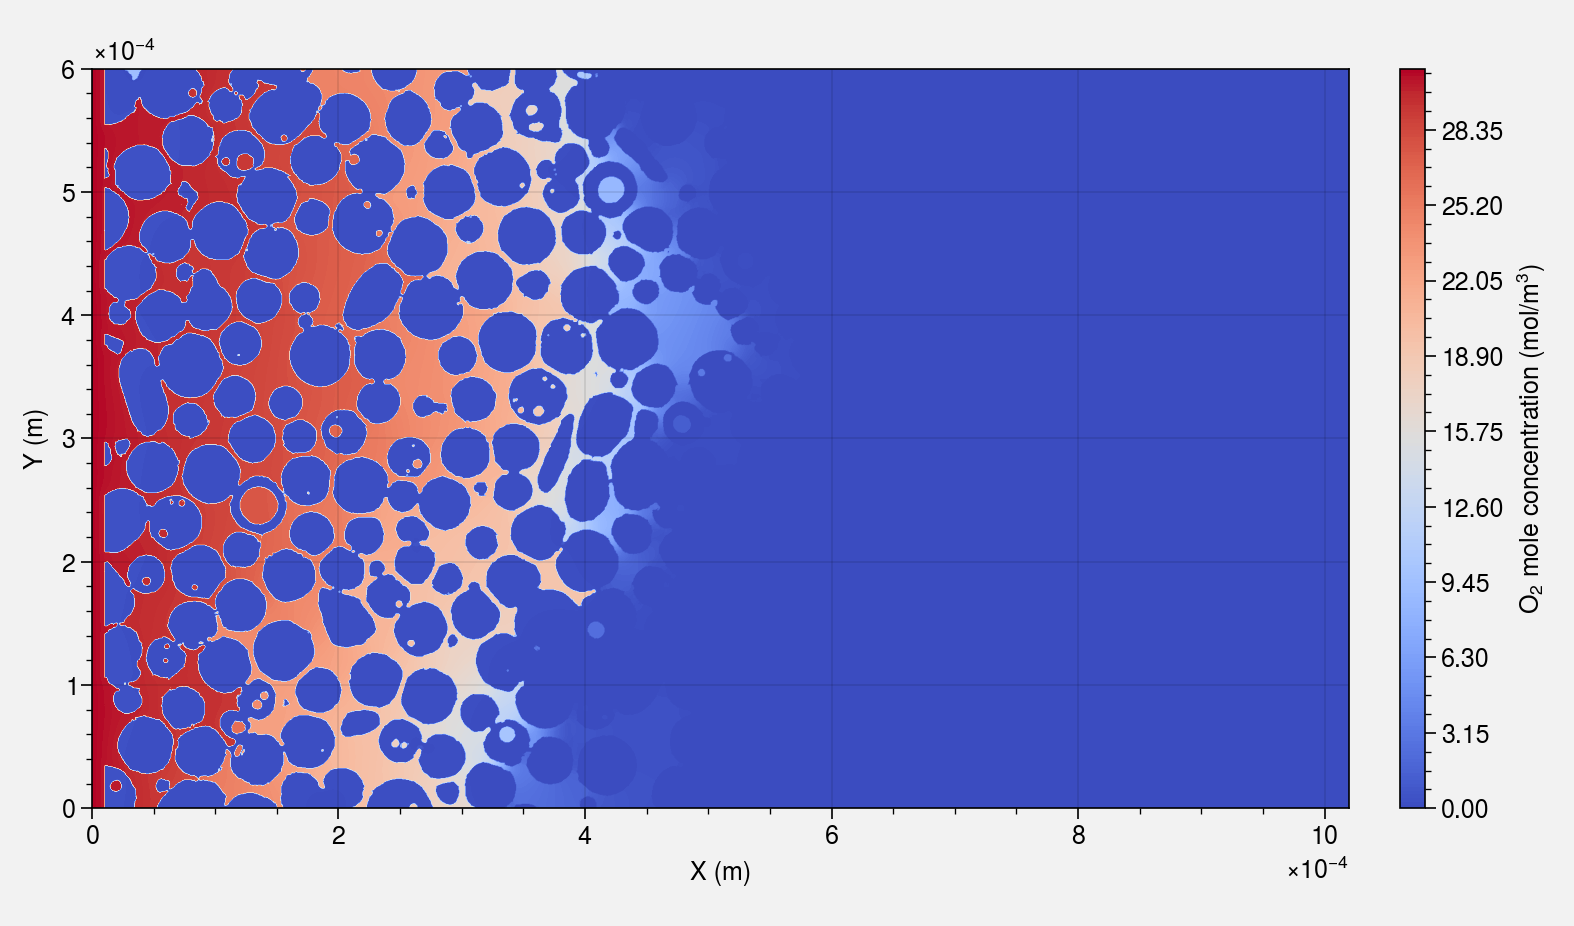

In [17]:
df4=readDataAndProcess(folder,"4.01")
plotContours(df4)

## Plot Maximum temperature

In [20]:
fieldminMaxFile="../postProcessing/minMaxComponents/fieldMinMax.dat"
with open(fieldminMaxFile,"r") as fp:
    comment=fp.readline()
    header=fp.readline()
header=header[1:-1].split()
indexs_processor=[]
for i,name in enumerate(header):
    if header[i]=="processor":
        indexs_processor.append(i)
indexs_processor.reverse()  

data=pd.read_csv(fieldminMaxFile,comment='#', sep='\t',header=None)
data=data.drop(indexs_processor,axis=1)
data.rename(columns=lambda x:header[x],inplace=True)
data.head()
sampling_rate=10    
data_sampling=data[data.index%sampling_rate==0]
data_sampling.shape

(3718, 6)

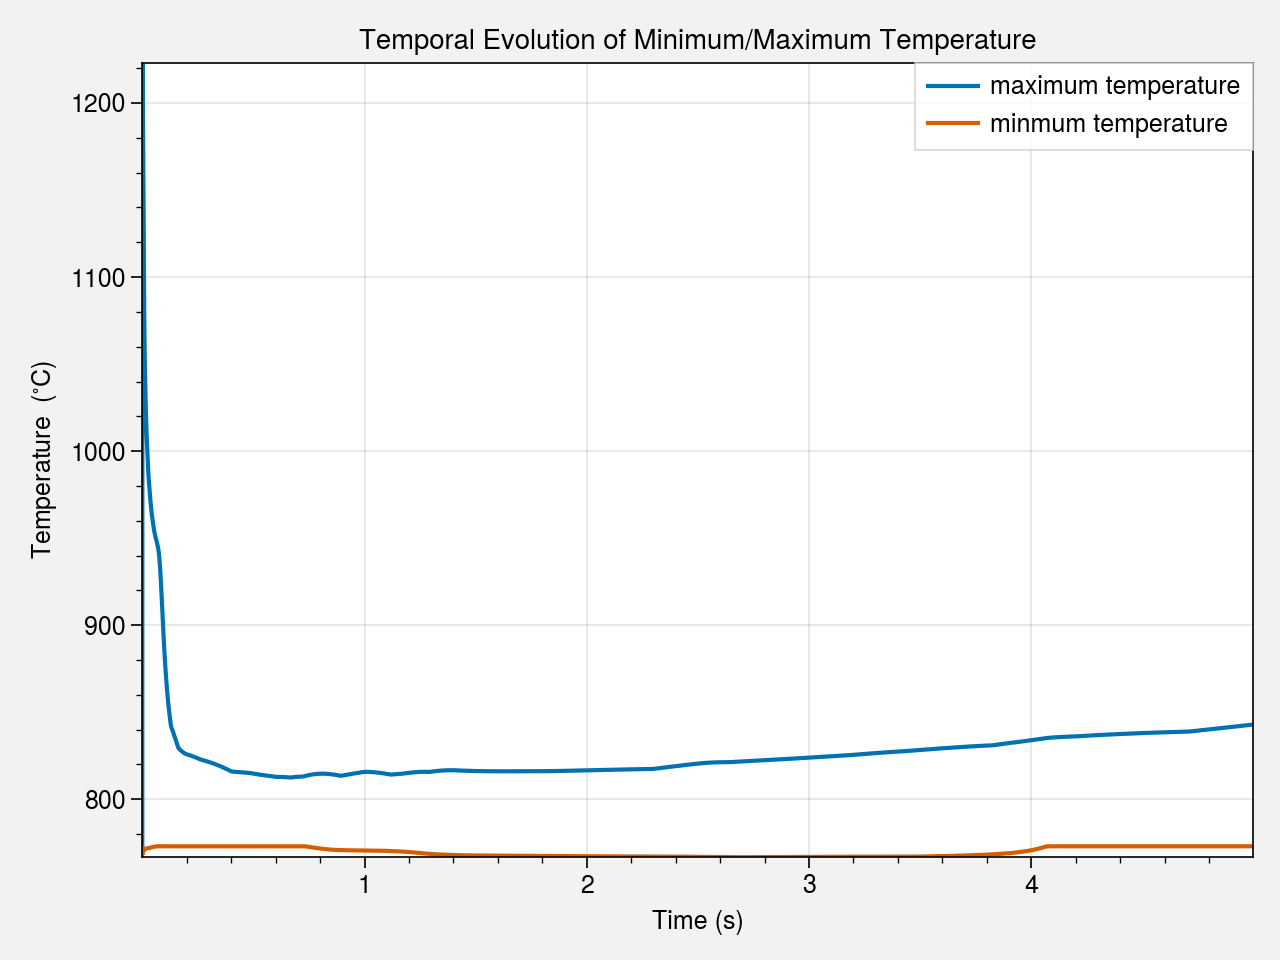

In [22]:
fig, ax = plt.subplots()
ax.plot(data_sampling["Time"],data_sampling["max"],label="max temperature")
ax.plot(data_sampling["Time"],data_sampling["min"],label="min temperature")
ax.set_xlabel(f"Time (s)")
ax.set_ylabel("Temperature  ($^{\circ}$C)")
ax.set_title("Temporal Evolution of Minimum/Maximum Temperature")
ax.legend()
ax.autoscale(tight=True)
plt.tight_layout()
